In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split 
import time
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pickle
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [3]:
dataset1=pd.read_csv("preprocessed_house_rent.csv",index_col=None)
df2=dataset1
df2 = pd.get_dummies(df2, drop_first=True,dtype=int)
indep_X=df2.drop('Rent',axis=1)
dep_Y=df2['Rent']

In [5]:
df2

,BHK,Rent,Size,City,Bathroom,Area Type_Carpet Area,Area Type_Super Area,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Floor Number,Total Floors
0,2,10000,1100,4,2,0,1,1,0,0,1,0,2
1,2,20000,800,4,1,0,1,1,0,1,0,1,3
2,2,17000,1000,4,1,0,1,1,0,1,0,1,3
3,2,10000,800,4,1,0,1,1,0,0,1,1,2
4,2,7500,850,4,1,1,0,0,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3,2,1,0,1,0,1,0,3,5
4742,3,29000,2000,3,3,0,1,1,0,1,0,1,4
4743,3,35000,1750,3,3,1,0,1,0,1,0,3,5
4744,3,45000,1500,3,2,1,0,0,1,1,0,23,34


In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(indep_X, dep_Y, test_size=0.3, random_state=42)


In [7]:
#Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
#Fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
#Get feature importances
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)


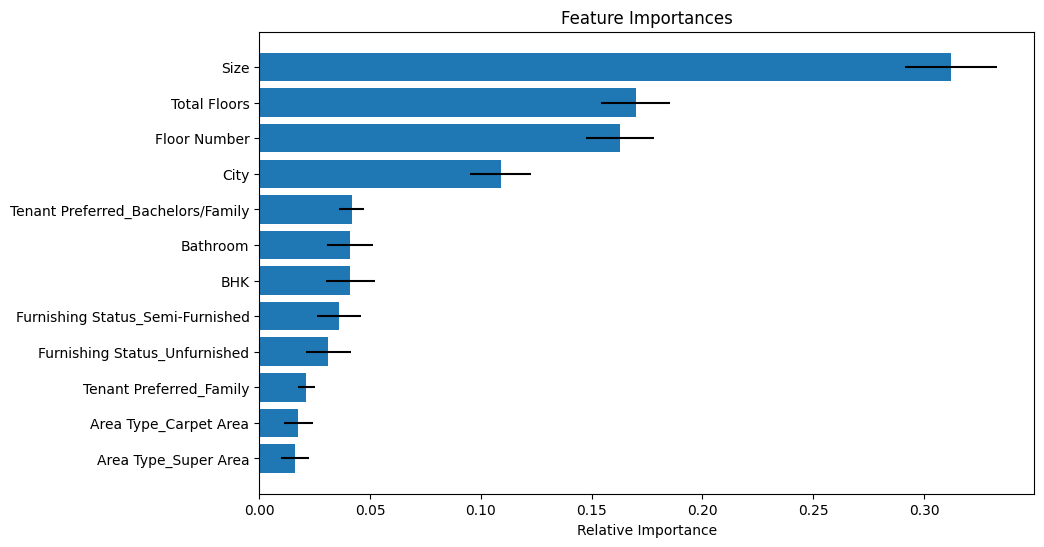

In [9]:
# Create a bar plot to visualize the feature importance
#Check if X is still a DataFrame, otherwise use feature names manually
if isinstance(indep_X, pd.DataFrame):
    features =indep_X.columns
else:
    features = [f"Feature {i}" for i in range(X.shape[1])]  # Manually create feature names
#Sort the feature importances in descending order and plot
indices = importances.argsort()
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(indep_X.shape[1]), importances[indices], xerr=std[indices], align="center")
plt.yticks(range(indep_X.shape[1]), [features[i] for i in indices])  # Use list comprehension to reorder features
plt.xlabel("Relative Importance")
plt.show()


In [10]:
 # Print feature importances
 print("Feature Importances:")
for feature, importance in zip([features[i] for i in indices], importances[indices]):
    print(f"{feature}: {importance:.4f}")




Feature Importances:
Area Type_Super Area: 0.0160
Area Type_Carpet Area: 0.0176
Tenant Preferred_Family: 0.0213
Furnishing Status_Unfurnished: 0.0312
Furnishing Status_Semi-Furnished: 0.0360
BHK: 0.0410
Bathroom: 0.0411
Tenant Preferred_Bachelors/Family: 0.0417
City: 0.1090
Floor Number: 0.1628
Total Floors: 0.1698
Size: 0.3123
